Part 1: Understanding Regularization
### Q1. What is regularization in the context of deep learning? Why is it important?

Regularization is a technique used to prevent overfitting in deep learning models by adding a penalty to the loss function. Overfitting occurs when a model performs well on training data but poorly on unseen test data, implying that the model has learned noise and specific details from the training data rather than general patterns.

**Importance:**

Prevents Overfitting: Regularization helps ensure that the model generalizes well to new data by discouraging overly complex models.
Improves Generalization: By adding a penalty to large weights, regularization forces the model to find simpler and more robust solutions.

### Q2. Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff. Bias-Variance Tradeoff:

Bias: Error due to overly simplistic models that cannot capture the underlying patterns of the data (underfitting).
Variance: Error due to overly complex models that capture noise and details in the training data (overfitting).
Regularization helps manage this tradeoff by penalizing complexity (variance), which reduces overfitting while maintaining enough flexibility to capture the underlying patterns (reducing bias).

### Q3. Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model?

**L1 Regularization (Lasso):**

Penalty Calculation: Adds the absolute value of the weights to the loss function.
$$
L_1 = \lambda \sum_i |w_i|
 $$
Effect: Encourages sparsity in the model weights, potentially setting some weights to zero. This can lead to simpler models with fewer features being used.

**L2 Regularization (Ridge):**

Penalty Calculation: Adds the square of the weights to the loss function.
$$
L_2 = \lambda \sum_i |w_i|^2
$$

Effect: Penalizes large weights more heavily, leading to weight shrinkage but typically not to zero. This helps in distributing the impact across all features rather than eliminating some.
Differences:

Penalty Type: L1 uses absolute values, while L2 uses squared values.
Model Impact: L1 leads to sparsity (feature selection), L2 leads to small but non-zero weights (weight decay).
4. Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.
Regularization techniques like L1 and L2:

Prevent Overfitting: By adding a penalty for large weights, regularization discourages the model from fitting to noise in the training data.
Improve Generalization: Encouraging simpler models that focus on the most important patterns in the data improves the model's ability to generalize to new, unseen data.
Enhance Robustness: Regularization makes the model more robust to variations in the training data and reduces sensitivity to small fluctuations.
Part 2: Applying Regularization
To apply regularization techniques in practice, you can implement L1 and L2 regularization in a neural network model using a deep learning framework like TensorFlow/Keras.

## Example Implementation in Keras:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2

# Define a simple neural network model with L2 regularization
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Hidden layer with L1 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


**Practical Considerations**:

- **Choosing Regularization Type:** Use L1 if you want a sparse model, use L2 for weight decay without sparsity, or a combination for both effects.

- **Tuning Regularization Parameter (𝜆):** The regularization strength must be tuned, usually via cross-validation.

- **Impact on Training:** Regularization may slow down the training process since it adds additional computation to each weight update.

- **Task-Specific Considerations:** The appropriate regularization technique and strength can vary based on the specific task, dataset, and model architecture.

By implementing and comparing different regularization techniques, you can assess their impact on model performance and generalization, leading to more robust and reliable deep learning models.







## Part 3: Applying Regularization

1. Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate its impact on model performance and compare it with a model without Dropout.

Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.

Here's an example of implementing Dropout regularization in a Keras model and comparing it with a model without Dropout:

**Step 1: Import Necessary Libraries**

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load and preprocess the dataset
data = load_wine()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 2: Define the Model without Dropout**



In [47]:
# Model without Dropout
# Define the model architecture
ndmodel = Sequential()

ndmodel.add(Dense(64,activation='relu',input_shape=(X_train_scaled.shape[1],)))
ndmodel.add(Dense(64,activation='relu'))
ndmodel.add(Dense(3,activation='softmax'))

ndmodel.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ndhistory = ndmodel.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                                          validation_data=(X_test_scaled, y_test),verbose=0)


In [16]:
import matplotlib.pyplot as plt

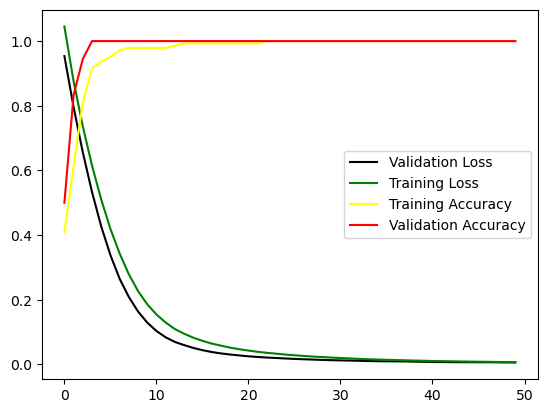

In [36]:


plt.plot(ndhistory.history['val_loss'],color='black',label='Validation Loss')
plt.plot(ndhistory.history['loss'],color='green',label='Training Loss')
plt.plot(ndhistory.history['accuracy'],color='yellow',label='Training Accuracy')
plt.plot(ndhistory.history['val_accuracy'],color='Red',label='Validation Accuracy')
plt.legend()

#plt.plot(ndhistory.history['val_accuracy'],color='green')

In [46]:
# Evaluate the model without Dropout
ndresults = ndmodel.evaluate(X_test_scaled, y_test)
print(f"Test Loss without Dropout: {ndresults[0]}")
print(f"Test Accuracy without Dropout: {ndresults[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0043 
Test Loss without Dropout: 0.004193415399640799
Test Accuracy without Dropout: 1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0240 
Test Loss with Dropout: 0.02311439998447895
Test Accuracy with Dropout: 1.0


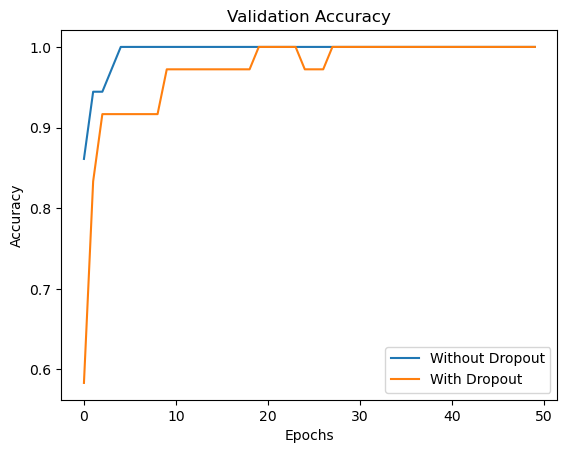

In [52]:
# Model with Dropout
dmodel = Sequential()

dmodel.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dmodel.add(Dropout(0.5))
dmodel.add(Dense(64, activation='relu'))
dmodel.add(Dropout(0.5))
dmodel.add(Dense(3, activation='softmax'))

dmodel.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with Dropout
dhistory = dmodel.fit(X_train_scaled, y_train, epochs=50, batch_size=32,
                      validation_data=(X_test_scaled, y_test),verbose=0)

# Evaluate the model with Dropout
dresults = dmodel.evaluate(X_test_scaled, y_test)
print(f"Test Loss with Dropout: {dresults[0]}")
print(f"Test Accuracy with Dropout: {dresults[1]}")

# Plot accuracy for both models
import matplotlib.pyplot as plt

plt.plot(ndhistory.history['val_accuracy'], label='Without Dropout')
plt.plot(dhistory.history['val_accuracy'], label='With Dropout')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
dmodel.evaluate(X_test_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0081 


[0.007781574502587318, 1.0]

### - We can see the fluctuation in accuracy with dropout because of the size of the data.